In [1]:
%matplotlib inline
from matplotlib import pyplot as plt, cm
import requests
from hashlib import md5
import os
from glob import glob
from skimage import io
from skimage import novice
from skimage import io
from skimage import data, segmentation, filters, color, img_as_float, img_as_ubyte, exposure, feature, measure, morphology
from skimage.color import rgb2gray
from skimage.morphology import square
from sklearn.externals import joblib
import cv2
import numpy as np
from time import time
import random

In [2]:
# 데이터가 저장될 기본 경로를 지정
p = "./data_unlabel/"

In [6]:
# 이미지 이름을(MD5) 불러와서 웹에서 신규 이미지를 저장 시 중복된 이미지가 저장되는 것을 방지
md5list = glob(os.path.join(p + "*.png"))
md5list = [os.path.split(fname)[1] for fname in md5list]
print "the number of files is %s" %len(md5list)

the number of files is 14


In [7]:
# 동일 user agent로 요청 시 서버 탐지를 피하기 위해 user agent를 랜덤하게 전송
agent_list = ["Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36",
                  "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.1 Safari/537.36",
                  "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.0 Safari/537.36",
                  "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.0 Safari/537.36",
                  "Mozilla/5.0 (Windows NT 6.4; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2225.0 Safari/537.36",
                  "Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2225.0 Safari/537.36",
                  "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.124 Safari/537.36",
                  "Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36",
                  "Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.67 Safari/537.36",
                  "Mozilla/5.0 (X11; OpenBSD i386) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36",
                  "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36",
                  "Mozilla/5.0 (Windows NT 6.3; rv:36.0) Gecko/20100101 Firefox/36.0",
                  "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10; rv:33.0) Gecko/20100101 Firefox/33.0",
                  "Mozilla/5.0 (X11; Linux i586; rv:31.0) Gecko/20100101 Firefox/31.0",
                  "Mozilla/5.0 (Windows NT 6.1; WOW64; rv:29.0) Gecko/20120101 Firefox/29.0",
                  "Mozilla/5.0 (X11; OpenBSD amd64; rv:28.0) Gecko/20100101 Firefox/28.0",
                  "Mozilla/5.0 (Windows NT 6.1; rv:27.3) Gecko/20130101 Firefox/27.3"]

In [8]:
def get_captcha_img():
    User_Agent = random.choice(agent_list)
    headers = {"User-Agent" : User_Agent}
    img = requests.get("http://www.sktmembership.co.kr/simpleCaptcha.do", headers=headers)

    if img.status_code == 200:
        if md5(img.content).hexdigest() not in md5list:
            fname = os.path.join(p, md5(img.content).hexdigest() + ".png")

            with open(fname, 'wb') as f:
                f.write(img.content)

            md5list.append(fname)

        else:
            print "same file detected!!"

In [9]:
# req에 원하는 요청의 갯수 입력
cnt = 1
req = 100
while(cnt < req):
    get_captcha_img()
    cnt += 1
    print "%s requests" %cnt

2 requests
3 requests
4 requests
5 requests
6 requests
7 requests
8 requests
9 requests
10 requests
11 requests
12 requests
13 requests
14 requests
15 requests
16 requests
17 requests
18 requests
19 requests
20 requests
21 requests
22 requests
23 requests
24 requests
25 requests
26 requests
27 requests
28 requests
29 requests
30 requests
31 requests
32 requests
33 requests
34 requests
35 requests
36 requests
37 requests
38 requests
39 requests
40 requests
41 requests
42 requests
43 requests
44 requests
45 requests
46 requests
47 requests
48 requests
49 requests
50 requests
51 requests
52 requests
53 requests
54 requests
55 requests
56 requests
57 requests
58 requests
59 requests
60 requests
61 requests
62 requests
63 requests
64 requests
65 requests
66 requests
67 requests
68 requests
69 requests
70 requests
71 requests
72 requests
73 requests
74 requests
75 requests
76 requests
77 requests
78 requests
79 requests
80 requests
81 requests
82 requests
83 requests
84 requests
85 requests


In [10]:
# gray형태의 이미지를 체크 후 삭제
def check_grayfile(fname):
    picture = novice.open(fname)
    cnt = 0
    for pixel in picture:
        if (pixel.red == pixel.green == pixel.blue) == True:
            cnt += 1
    area = picture.width * picture.height
            
    return area, cnt

In [11]:
md5list = glob(os.path.join(p + "*.png"))
print "the number of files was %s" %len(md5list)

for fname in md5list:
    area, cnt = check_grayfile(fname)
    if area == cnt:
        os.remove(fname)
        
md5list = glob(os.path.join(p + "*.png"))
print "the number of files is %s" %len(md5list)

the number of files was 113
the number of files is 66


In [14]:
# 이미지에서 5개로 숫자가 분리되지 않는 경우 삭제
def check_5_rectangle(fname):
    
    im = io.imread(fname)
    w, h, _ = im.shape

    for x in range(w):
        for j in range(h):

            if im[x][j][0] == im[x][j][1] and im[x][j][1] == im[x][j][2] and im[x][j][2] == im[x][j][0]:
                im[x][j][0] = 255
                im[x][j][1] = 255
                im[x][j][2] = 255

    im_gray = rgb2gray(im)
    im_gray = img_as_ubyte(im_gray)
    im_gray = morphology.opening(im_gray, square(2))
    im_gray_equalize = exposure.equalize_hist(im_gray)

    threshold = filters.threshold_otsu(im_gray_equalize).copy()
    threshold = im_gray_equalize < threshold
    threshold = img_as_ubyte(threshold)

    bw = morphology.closing(im_gray_equalize < threshold, square(3))
    cleared = bw.copy()

    im_th = cleared
    ctrs, hier = cv2.findContours(img_as_ubyte(im_th.copy()), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    rects = [cv2.boundingRect(ctr) for ctr in ctrs]
    rects = sorted(rects, key=lambda tup: tup[0])

    if len(rects) == 5:
        return True
    else:
        return False

In [15]:
t0 = time()
md5list = glob(os.path.join(p + "*.png"))
print "the number of files was %s" %len(md5list)

for fname in md5list:
    r = check_5_rectangle(fname)
    if r == False:
        os.remove(fname)
        
print "escape time : ", round(time()-t0, 3), "s"
md5list = glob(os.path.join(p + "*.png"))
print "the number of files is %s" %len(md5list)

the number of files was 66
escape time :  3.116 s
the number of files is 25


/Users/dikien/anaconda/lib/python2.7/site-packages/skimage/util/dtype.py:107: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [18]:
# 각각의 숫자가 얼만큼의 빈도수로 출현하는지 표현
# data_label : 원본 데이터에 filename_{lable}.png형태로 lable을 붙여줌
# data_unlabel : 원본 데이터
md5list = glob(os.path.join("./data_label/" + "*.png"))
md5list_len = len(md5list)

all_digits = ""
for fname in md5list:
    lable = os.path.split(fname)[1].split("_")[1][:5]
    
    if len(lable) == 5:
        all_digits += lable
    else:
        print "%s file isn't 5 digits" %fname

for i in range(9):
    print "%s have %s, %s percent" %(i, all_digits.count(str(i)), str(md5list_len*5/all_digits.count(str(i))))


0 have 537, 9 percent
1 have 791, 6 percent
2 have 484, 10 percent
3 have 499, 10 percent
4 have 605, 8 percent
5 have 510, 9 percent
6 have 313, 15 percent
7 have 692, 7 percent
8 have 569, 8 percent


In [2]:
t0 = time()
features = []
lables = []

md5list = glob(os.path.join("./data_label/" + "*.png"))
print "the number of files was %s" %len(md5list)

# captcha를 preprossing후 mnist처럼 numpy array로 만들자
for fname in md5list:
    lable = os.path.split(fname)[1].split("_")[1][:5]
    im = io.imread(fname)
    w, h, _ = im.shape

    for x in range(w):
        for j in range(h):

            if im[x][j][0] == im[x][j][1] and im[x][j][1] == im[x][j][2] and im[x][j][2] == im[x][j][0]:
                im[x][j][0] = 255
                im[x][j][1] = 255
                im[x][j][2] = 255

    im_gray = rgb2gray(im)
    im_gray = img_as_ubyte(im_gray)
    im_gray = morphology.opening(im_gray, square(2))
    im_gray_equalize = exposure.equalize_hist(im_gray)

    threshold = filters.threshold_otsu(im_gray_equalize).copy()
    threshold = im_gray_equalize < threshold
    threshold = img_as_ubyte(threshold)

    bw = morphology.closing(im_gray_equalize < threshold, square(3))
    cleared = bw.copy()

    im_th = cleared
    ctrs, hier = cv2.findContours(img_as_ubyte(im_th.copy()), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    rects = [cv2.boundingRect(ctr) for ctr in ctrs]
    rects = sorted(rects, key=lambda tup: tup[0])

    if len(rects) != 5:
        continue


    for rect, l in zip(rects, lable):
        # Draw the rectangles
        cv2.rectangle(threshold, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 1) 

        # Make the rectangular region around the digit
        roi = threshold[rect[1]:rect[1]+rect[3], rect[0]:rect[0]+rect[2]]
        roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
        roi = morphology.closing(roi, square(4))
        
        features.append(roi.ravel())
        lables.append([l])

features = np.array(features, 'int16')
labels = np.array(lables, 'int').ravel()
md5list = glob(os.path.join("./data_label/" + "*.png"))
print "the number of files is %s" %len(md5list)
print "escape time : ", round(time()-t0, 3), "s"

the number of files was 1000
the number of files is 1000
escape time :  59.442 s


/Users/dikien/anaconda/lib/python2.7/site-packages/skimage/util/dtype.py:107: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [23]:
# features, lables의 차원을 출력
print features.shape
print labels.shape

(5000, 784)
(5000,)


In [3]:
# features, lables을 각각 저장
joblib.dump(features, "./mldata/features_1000.mat", compress=3)
joblib.dump(labels, "./mldata/lables_1000.mat", compress=3)

['./mldata/lables_1000.mat']

In [77]:
# 샘플이미지를 두 개에 대해 28*28형태로 변환
sample_0 = features[2].reshape((28, 28))
sample_1 = features[3].reshape((28, 28))

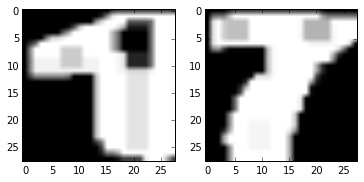

In [78]:
# 샘플이미지가 정상적으로 출력됨을 확인
fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(sample_0, cmap='gray')
ax1.imshow(sample_1, cmap='gray')

print "First image is %s " %labels[2]
print "Second image is %s" %labels[3]

In [2]:
t0 = time()
features = []
lables = []

md5list_1 = glob(os.path.join("./data_test//" + "*.png"))
md5list = glob(os.path.join("./data_label/" + "*.png")) + md5list_1
print "the number of files was %s" %len(md5list)

# captcha를 preprossing후 mnist처럼 numpy array로 만들자
for fname in md5list:
    lable = os.path.split(fname)[1].split("_")[1][:5]
    im = io.imread(fname)
    w, h, _ = im.shape

    for x in range(w):
        for j in range(h):

            if im[x][j][0] == im[x][j][1] and im[x][j][1] == im[x][j][2] and im[x][j][2] == im[x][j][0]:
                im[x][j][0] = 255
                im[x][j][1] = 255
                im[x][j][2] = 255

    im_gray = rgb2gray(im)
    im_gray = img_as_ubyte(im_gray)
    im_gray = morphology.opening(im_gray, square(2))
    im_gray_equalize = exposure.equalize_hist(im_gray)

    threshold = filters.threshold_otsu(im_gray_equalize).copy()
    threshold = im_gray_equalize < threshold
    threshold = img_as_ubyte(threshold)

    bw = morphology.closing(im_gray_equalize < threshold, square(3))
    cleared = bw.copy()

    im_th = cleared
    ctrs, hier = cv2.findContours(img_as_ubyte(im_th.copy()), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    rects = [cv2.boundingRect(ctr) for ctr in ctrs]
    rects = sorted(rects, key=lambda tup: tup[0])

    if len(rects) != 5:
        continue


    for rect, l in zip(rects, lable):
        # Draw the rectangles
        cv2.rectangle(threshold, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 1) 

        # Make the rectangular region around the digit
        roi = threshold[rect[1]:rect[1]+rect[3], rect[0]:rect[0]+rect[2]]
        roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
        roi = morphology.closing(roi, square(4))
        
        features.append(roi.ravel())
        lables.append([l])

features = np.array(features, 'int16')
labels = np.array(lables, 'int').ravel()
md5list = glob(os.path.join("./data_label/" + "*.png"))
print "the number of files is %s" %len(md5list)
print "escape time : ", round(time()-t0, 3), "s"

the number of files was 1200
the number of files is 1000
escape time :  73.561 s


/Users/dikien/anaconda/lib/python2.7/site-packages/skimage/util/dtype.py:107: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [3]:
# features, lables의 차원을 출력
print features.shape
print labels.shape

(6000, 784)
(6000,)


In [4]:
# features, lables을 각각 저장
joblib.dump(features, "./mldata/features_1200.mat", compress=3)
joblib.dump(labels, "./mldata/lables_1200.mat", compress=3)

['./mldata/lables_1200.mat']

In [3]:
def scale(X, eps = 0.001):
    # scale the data points s.t the columns of the feature space
    # (i.e the predictors) are within the range [0, 1]
    return (X - np.min(X, axis = 0)) / (np.max(X, axis = 0) + eps)

(array([ 640.,  921.,  616.,  593.,  739.,  619.,  370.,  840.,  662.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

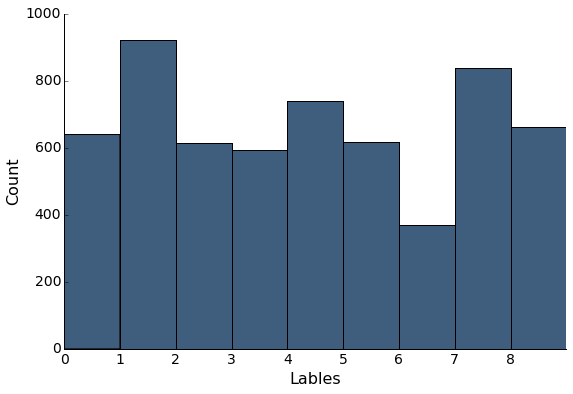

In [6]:
features = joblib.load("./mldata/features_1200.mat")
labels = joblib.load("./mldata/lables_1200.mat")

features = features.astype("float32")
features = scale(features)
labels = np.array(labels, 'int')

unique, counts = np.unique(labels, return_counts=True)

plt.figure(figsize=(9, 6))

# Remove the plot frame lines. They are unnecessary chartjunk.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  

# Ensure that the axis ticks only show up on the bottom and left of the plot.  
# Ticks on the right and top of the plot are generally unnecessary chartjunk.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  

# Make sure your axis ticks are large enough to be easily read.  
# You don't want your viewers squinting to read your plot.  
plt.xticks(unique, fontsize=14)  
plt.yticks(fontsize=14)  

# Along the same vein, make sure your axis labels are large  
# enough to be easily read as well. Make them slightly larger  
# than your axis tick labels so they stand out.  
plt.xlabel("Lables", fontsize=16)  
plt.ylabel("Count", fontsize=16)

ax.hist(labels, bins=range(10), cumulative=False, color="#3F5D7D")